# Simulations numériques du rapport du COR de Juin 2019 - Calcul de pension annuelle (brut)

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.EtudeImpact import EtudeImpact
import pylab as pl
import numpy as np

In [2]:
simulateur = SimulateurRetraites()

## Calcul du PIB

In [3]:
analyse_COR = simulateur.pilotageCOR()

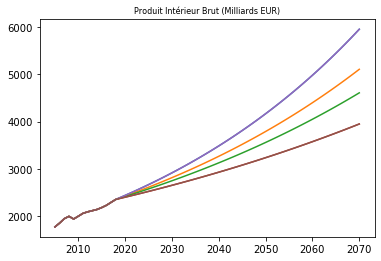

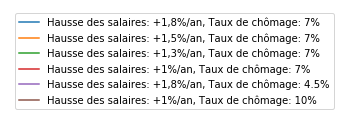

In [4]:
analyse_COR.dessineVariable("PIB")
analyse_COR.dessineLegende()

## Validation de la pension annuelle

Source : Les retraités et les retraites, Edition 2017, Panoramas de la DREES

![Pension mensuelle moyenne brute (DREES, 2017)](DREES-2017-Pension-par-retraite.png)


In [5]:
donnees_DREES_2017_totale = {
    2004: 1188,
    2005: 1224,
    2006: 1262,
    2007: 1300,
    2008: 1343,
    2009: 1366,
    2010: 1392,
    2011: 1432,
    2012: 1462,
    2013: 1492,
    2014: 1508,
    2015: 1520,
}

In [6]:
def extraitAnneesPensions(donnees):
    """Extrait les années et les pensions 
    d'un dictionnaire (année, pension).
    """
    annees = []
    pensions = []
    for a in donnees.keys():
        annees.append(int(a))
        pensions.append(donnees[a])
    return annees, pensions

In [7]:
donnees_annees_DREES, donnees_pensions_DREES = extraitAnneesPensions(
    donnees_DREES_2017_totale
)

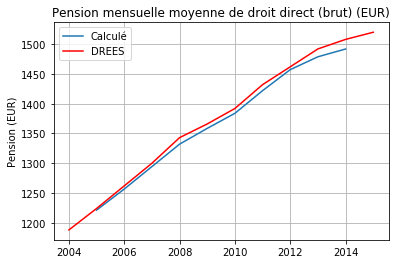

In [8]:
annees = range(2005, 2015)
titre = "Calculé"
s = 1  # Le passé est le même dans tous les scénarios
y = [analyse_COR.PensionBrut[s][a] * 1000.0 / 12.0 for a in annees]
pl.plot(annees, y, label=titre)
pl.plot(donnees_annees_DREES, donnees_pensions_DREES, "r-", label="DREES")
pl.title("Pension mensuelle moyenne de droit direct (brut) (EUR)")
pl.ylabel("Pension (EUR)")
pl.grid()
pl.legend();

## Projection COR

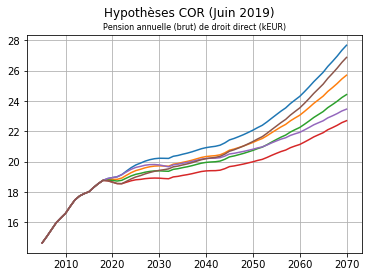

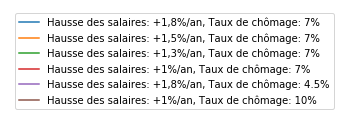

In [9]:
pl.suptitle("Hypothèses COR (Juin 2019)")
analyse_COR.dessineVariable("PensionBrut")
pl.grid()
analyse_COR.dessineLegende()

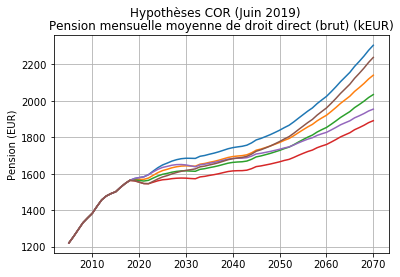

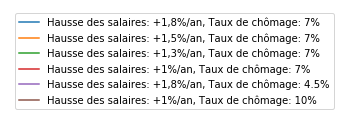

In [10]:
pl.suptitle("Hypothèses COR (Juin 2019)")
pl.title("Pension mensuelle moyenne de droit direct (brut) (kEUR)")
for s in simulateur.scenarios:
    y = [
        analyse_COR.PensionBrut[s][a] * 1000.0 / 12.0
        for a in analyse_COR.annees
    ]
    pl.plot(analyse_COR.annees, y)
pl.ylabel("Pension (EUR)")
pl.grid()
analyse_COR.dessineLegende()

## Projection étude d'impact

In [11]:
etudeImpact = EtudeImpact(simulateur)
analyse_EI = etudeImpact.calcule()

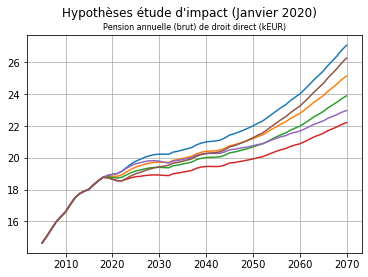

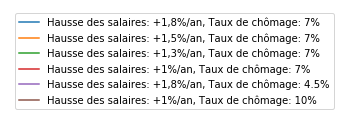

In [12]:
pl.suptitle("Hypothèses étude d'impact (Janvier 2020)")
analyse_EI.dessineVariable("PensionBrut")
pl.grid()
pl.savefig("../../Article4/Simulation-pension-annuelle-moyenne.pdf")
analyse_COR.dessineLegende()

## Comparaison COR et étude d'impact

Pour faciliter la comparaison avec l'étude d'impact, nous utilisons les mêmes couleurs. 

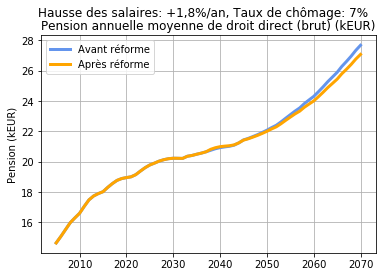

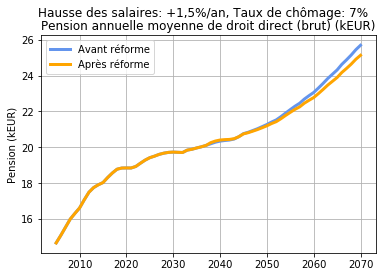

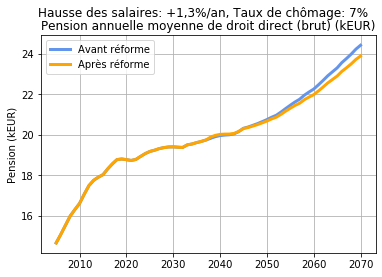

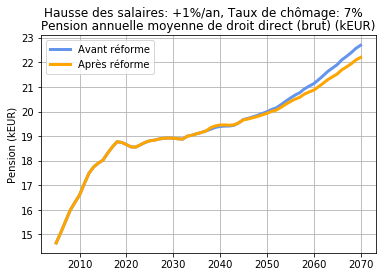

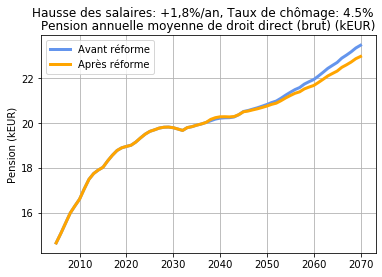

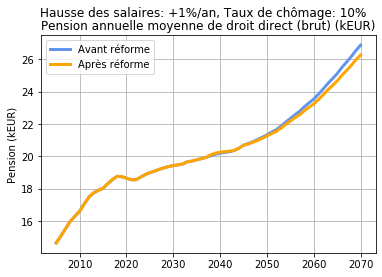

In [13]:
for s in simulateur.scenarios:
    pl.figure()
    titre = simulateur.scenarios_labels[s]
    pl.suptitle(titre)
    pl.title("Pension annuelle moyenne de droit direct (brut) (kEUR)")
    y = [analyse_COR.PensionBrut[s][a] for a in analyse_EI.annees]
    pl.plot(
        analyse_EI.annees,
        y,
        label="Avant réforme",
        color=etudeImpact.couleur_HR,
        linewidth=etudeImpact.epaisseur_ligne,
    )
    y = [analyse_EI.PensionBrut[s][a] for a in analyse_EI.annees]
    pl.plot(
        analyse_EI.annees,
        y,
        label="Après réforme",
        color=etudeImpact.couleur_SUR,
        linewidth=etudeImpact.epaisseur_ligne,
    )
    pl.ylabel("Pension (kEUR)")
    pl.grid()
    pl.legend()
    filename = "../../Article4/Simulation-pension-annuelle-moyenne-%d" % (s)
    pl.savefig(filename + ".pdf")

## Comparaison entre l'étude d'impact simulée et l'étude d'impact du gouvernement

On souhaite comparer les montants de pension annuelle de droit direct simulées et celles présentées dans l'étude d'impact. 

Pour cela, nous utilisons deux sources d'information issues de l'étude d'impact  de Janvier 2020.

* Le graphique 59 page 176 présente la pension annuelle de droit direct moyenne hors réforme et la pension annuelle de droit direct moyenne du système universel. Il couvre les années de naissance de 1975 à 1990.

* Le graphique 73 page 199 de l’étude d’impact présente l'âge moyen à la liquidation par génération. Il couvre les années de naissance de 1975 à 2000.

Dans l'étude d'impact, l'ensemble des personnes nées la même année est nommée "génération". 


Deux difficultés se présentent.

* Le graphique 59 ne présente la pension en fonction de l'année de départ à la retraite, mais en fonction de l'année de naissance.  

* L'horizon temporel est différent entre les graphiques : celui du graphique 59 est plus réduit. 

![Graphique 59](../../Figures-Etude-Impact/EtudeImpact-Graphique-59-PensionAnnuelle.png)

C'est pourquoi on ne peut pas utiliser les données du graphique 59 pour comparer la pension moyenne perçue par une génération à la pension moyenne versée une année donnée par le système de retraites. En effet, cette dernière est calculée sur la base des pensions perçues par toutes les personnes à la retraite cette année-là, quelle que soit leur génération. Il n'est donc pas possible de comparer le graphique 59 à celui que nous avons créé. 

Pour cette raison, nous devons limiter la reproduction de la pension aux générations 1975 à 1990. De plus, il faut ajouter l'âge de départ à la retraite à l'année de naissance. Voici la méthode que nous utilisons.

Pour chaque année de naissance lue dans le graphique 59, nous relevons le montant de la pension.
Pour la même année de naissance, nous relevons l'âge de départ dans le graphique 73.
Nous pouvons ensuite présenter la pension en fonction de l'année de départ, en utilisant exclusivement les données de l'étude d'impact.

Dans cette méthode, les retraités sont implicitement supposés mourir après une année passée à la retraite, ce qui est une approximation. 
Pour lever cette limitation, il serait nécessaire de connaître la distribution des âges de départ à la retraite année après année et pas seulement l'âge moyen. En l'absence d'information nécessaire ainsi que d'une procédure de calcul, nous considérons que l'information reste pertinente. 

In [14]:
pension_data = np.genfromtxt(
    "../DigitalisationEI/EtudeImpact-Graphique-59-PensionAnnuelle-propre.csv",
    delimiter=",",
)
pension_annees = pension_data[:, 0]  # Année de naissance
pension_SUR = pension_data[:, 1]  # Système universel
pension_HR = pension_data[:, 2]  # Hors réforme

In [15]:
age_data = np.genfromtxt(
    "../DigitalisationEI/EtudeImpact-Graphique-73-AgeDepartRetraite-propre.csv",
    delimiter=",",
)
age_annees = age_data[:, 0]  # Année de naissance
age_avant = age_data[:, 1]  # Avant réforme
age_apres = age_data[:, 2]  # Après réforme

In [16]:
# Scénario +1.3%
s = 3
simulateur.scenarios_labels[s]

'Hausse des salaires: +1,3%/an, Taux de chômage: 7%'

In [17]:
nb_annees = pension_annees.shape[0]
nb_annees

17

In [18]:
annee_EI_graphique = []
pension_EI_graphique_SUR = []
pension_EI_graphique_HR = []
print(
    "Naissance, Age départ, Année départ, Pension SUR (kEUR), Pension HR (kEUR)"
)
for i in range(1, nb_annees):
    anneeDepart = pension_annees[i] + age_apres[i]
    print(
        "%.1f, %.1f, %.1f, %.1f, %.1f"
        % (
            pension_annees[i],
            age_apres[i],
            anneeDepart,
            pension_SUR[i] / 1000.0,
            pension_HR[i] / 1000.0,
        )
    )
    annee_EI_graphique.append(anneeDepart)
    pension_EI_graphique_SUR.append(pension_SUR[i] / 1000.0)
    pension_EI_graphique_HR.append(pension_HR[i] / 1000.0)

Naissance, Age départ, Année départ, Pension SUR (kEUR), Pension HR (kEUR)
1975.0, 63.6, 2038.6, 19.7, 19.5
1976.0, 63.8, 2039.8, 19.8, 19.6
1977.0, 63.8, 2040.7, 20.1, 19.7
1978.0, 63.9, 2041.9, 20.4, 19.8
1979.0, 63.9, 2042.9, 20.6, 19.9
1980.0, 64.0, 2044.0, 20.9, 20.1
1981.0, 64.0, 2045.0, 21.3, 20.4
1982.0, 64.2, 2046.2, 21.2, 20.2
1983.0, 64.2, 2047.2, 21.7, 20.5
1984.0, 64.3, 2048.3, 21.9, 20.6
1985.0, 64.4, 2049.4, 22.3, 20.9
1986.0, 64.5, 2050.5, 22.8, 21.3
1987.0, 64.5, 2051.5, 22.8, 21.2
1988.0, 64.7, 2052.7, 23.3, 21.5
1989.0, 64.7, 2053.7, 23.6, 21.7
1990.1, 64.8, 2054.8, 23.8, 21.7


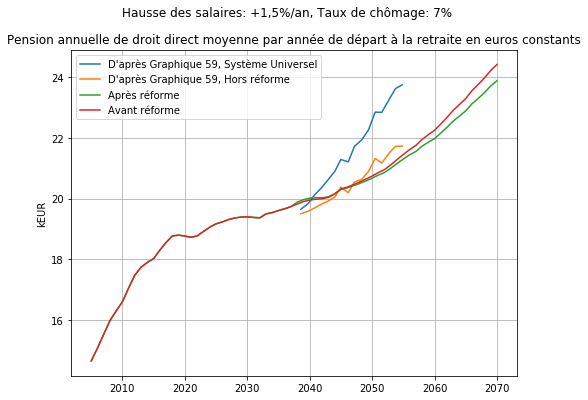

In [19]:
pl.figure(figsize=(8, 6))
pl.plot(
    annee_EI_graphique,
    pension_EI_graphique_SUR,
    label="D'après Graphique 59, Système Universel",
)
pl.plot(
    annee_EI_graphique,
    pension_EI_graphique_HR,
    label="D'après Graphique 59, Hors réforme",
)
pl.ylabel("kEUR")
pl.title(
    "Pension annuelle de droit direct moyenne par année de départ à la retraite en euros constants"
)
# Scénario +1.3%
s = simulateur.scenario_central
titre = simulateur.scenarios_labels[s - 1]
pl.suptitle(titre)
y = [analyse_EI.PensionBrut[s][a] for a in analyse_EI.annees]
pl.plot(analyse_EI.annees, y, label="Après réforme")

y = [analyse_COR.PensionBrut[s][a] for a in analyse_EI.annees]
pl.plot(analyse_EI.annees, y, label="Avant réforme")

pl.grid()
pl.legend(loc="best");

On observe que les graphiques de l'étude d'impact par génération sont assez différents de l'étude d'impact simulée. 
En particulier, la pente issue du graphique 59 est beaucoup plus forte. 
Cela confirme que considérer l'âge de départ et le montant des pensions par génération ne permet pas facilement de retrouver le montant de la pension pour une année donnée, comme nous l'avons vu précédemment. 

## Comparaison entre la pension brut simulée et la croissance

Représentons l'évolution du salaire moyen pour chaque taux de croissance du salaire moyen envisagé par le COR.

In [20]:
simulateur.annees_futures

range(2020, 2071)

In [21]:
print("Croissance des salaires")
salaires = dict()
for s in simulateur.scenarios:
    print("Taux de croissance : ", simulateur.scenarios_croissance[s], "%")
    salaires[s] = dict()
    for a in simulateur.annees_futures:
        if a == 2020:
            salaires[s][a] = 100.0
        else:
            salaires[s][a] = (
                1.0 + simulateur.scenarios_croissance[s] / 100.0
            ) * salaires[s][a - 1]

Croissance des salaires
Taux de croissance :  1.8 %
Taux de croissance :  1.5 %
Taux de croissance :  1.3 %
Taux de croissance :  1.0 %
Taux de croissance :  1.8 %
Taux de croissance :  1.0 %


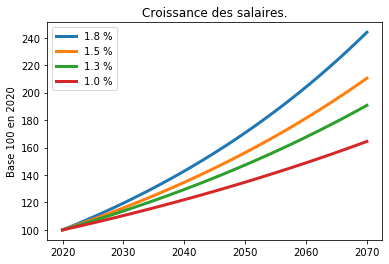

In [22]:
pl.figure()
pl.title("Croissance des salaires.")
pl.ylabel("Base 100 en 2020")
for s in simulateur.scenarios[0:4]:
    y = [salaires[s][a] for a in simulateur.annees_futures]
    label = "%.1f %%" % (simulateur.scenarios_croissance[s])
    pl.plot(
        simulateur.annees_futures,
        y,
        label=label,
        linewidth=etudeImpact.epaisseur_ligne,
    )
pl.legend();

Représentons l'évolution des pensions annuelles ainsi que celle des salaires. La comparaison est faite entre l'indice des pensions et l'indice des salaires, tous deux de base 100 en 2020.

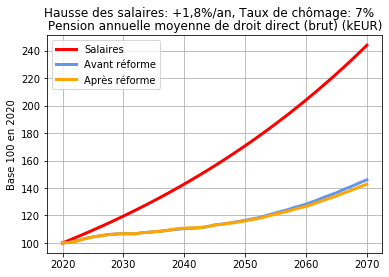

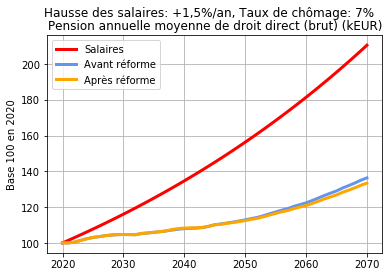

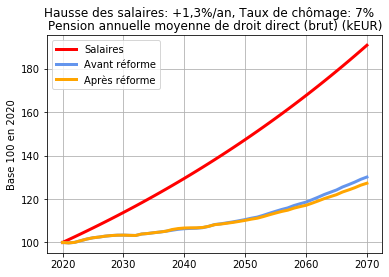

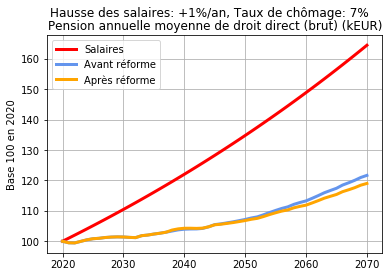

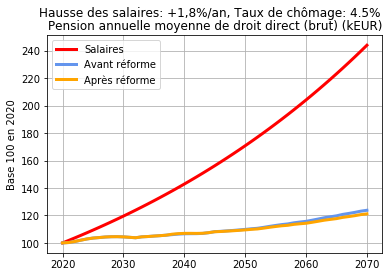

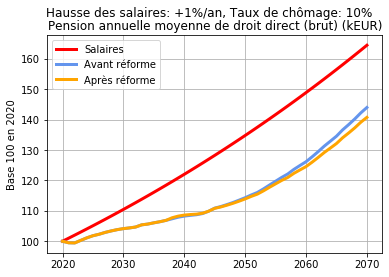

In [23]:
for s in simulateur.scenarios:
    pl.figure()
    titre = simulateur.scenarios_labels[s]
    pl.suptitle(titre)
    pl.title("Pension annuelle moyenne de droit direct (brut) (kEUR)")
    y = [salaires[s][a] for a in simulateur.annees_futures]
    pl.plot(
        simulateur.annees_futures,
        y,
        label="Salaires",
        color="r",
        linewidth=etudeImpact.epaisseur_ligne,
    )
    y = [
        analyse_COR.PensionBrut[s][a]
        * 100.0
        / analyse_COR.PensionBrut[s][2020]
        for a in simulateur.annees_futures
    ]
    pl.plot(
        simulateur.annees_futures,
        y,
        label="Avant réforme",
        color=etudeImpact.couleur_HR,
        linewidth=etudeImpact.epaisseur_ligne,
    )
    y = [
        analyse_EI.PensionBrut[s][a] * 100.0 / analyse_EI.PensionBrut[s][2020]
        for a in simulateur.annees_futures
    ]
    pl.plot(
        simulateur.annees_futures,
        y,
        label="Après réforme",
        color=etudeImpact.couleur_SUR,
        linewidth=etudeImpact.epaisseur_ligne,
    )
    pl.ylabel("Base 100 en 2020")
    pl.grid()
    pl.legend()
    filename = "../../Article4/Simulation-pension-vs-salaires-%d" % (s)
    pl.savefig(filename + ".pdf");

Dans le scénario central associé à une hausse des salaires égal à +1.3% et un taux de chômage égal à 7%, on observe que les salaires augmentent de 90 points environ tandis que les pensions n'augmentent que de 30 points environ. 